<a href="https://colab.research.google.com/github/kgalvanserrano/personal-projects/blob/main/Baseball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
import plotly.express as px
warnings.filterwarnings("ignore")
%matplotlib inline

# Some data analysis

In [ ]:
# Reading the batting datafilename
baseball = pd.read_csv("/content/pitch_data_questionnaire.csv")

In [ ]:
baseball.dtypes

pitch_id                     object
pitcher_id                   object
pa_of_inning                  int64
pitch_of_pa                   int64
inning                        int64
outs                          int64
balls                         int64
strikes                     float64
batter_side                  object
pitcher_throws               object
pitch_type                   object
pitch_call                   object
rel_speed                   float64
spin_rate                   float64
tilt                         object
rel_height                  float64
rel_side                    float64
extension                   float64
vert_break                  float64
induced_vert_break          float64
horz_break                  float64
plate_loc_height            float64
plate_loc_side              float64
strike_prob                 float64
runner_on_first_id          float64
runner_on_second_id         float64
runner_on_third_id          float64
post_runner_on_first_id     

In [ ]:
# how many rows and columns
baseball.shape

(4315, 38)

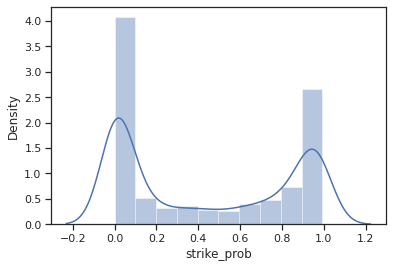

In [ ]:
sns.distplot(baseball['strike_prob'].dropna())

In [ ]:
baseball.isnull().values.any()

True

In [ ]:
missing = baseball.isnull().sum().sort_values(ascending=False)
missing

runner_on_third_id          3735
post_runner_on_third_id     3721
hit_type                    3680
runner_on_second_id         3351
post_runner_on_second_id    3316
distance                    3124
bearing                     3124
exit_speed                  3090
angle                       3089
direction                   3089
play_result                 2896
runner_on_first_id          2789
post_runner_on_first_id     2484
strikes                        2
tilt                           2
extension                      2
spin_rate                      1
strike_prob                    0
pitch_id                       0
plate_loc_height               0
plate_loc_side                 0
induced_vert_break             0
horz_break                     0
pitcher_id                     0
vert_break                     0
rel_side                       0
rel_height                     0
rel_speed                      0
pitch_call                     0
pitch_type                     0
pitcher_th

In [ ]:
baseball.corr()

,pa_of_inning,pitch_of_pa,inning,outs,balls,strikes,rel_speed,spin_rate,rel_height,rel_side,...,runner_on_second_id,runner_on_third_id,post_runner_on_first_id,post_runner_on_second_id,post_runner_on_third_id,direction,exit_speed,angle,distance,bearing
pa_of_inning,1.000000,-0.049559,-0.045856,0.717932,-0.029245,-0.043497,0.004237,0.044466,-0.124097,-0.039294,...,0.157786,0.322303,-0.073384,0.080551,0.154113,-0.016350,0.014134,-0.015072,0.005408,-0.014802
pitch_of_pa,-0.049559,1.000000,-0.013700,-0.040508,0.819277,0.793838,-0.006884,0.051912,-0.023945,-0.033773,...,0.103434,0.129353,0.086986,0.069856,0.107504,0.070120,0.001098,0.025382,0.016057,0.068163
inning,-0.045856,-0.013700,1.000000,-0.041570,-0.044294,0.020938,-0.004057,-0.056860,-0.118396,-0.056382,...,-0.021734,0.020377,0.006148,0.011494,-0.015308,-0.024158,-0.036554,-0.000650,-0.013138,0.010641
outs,0.717932,-0.040508,-0.041570,1.000000,-0.028580,-0.033432,0.006946,0.027567,-0.103910,0.040829,...,0.037239,0.155501,-0.055873,0.037795,0.001255,0.016909,0.029568,-0.043172,-0.018244,0.005354
balls,-0.029245,0.819277,-0.044294,-0.028580,1.000000,0.389253,0.011388,0.008563,-0.057871,-0.007189,...,0.109917,0.146419,0.109281,0.054375,0.135671,0.072107,0.017204,0.056997,0.028089,0.079009
strikes,-0.043497,0.793838,0.020938,-0.033432,0.389253,1.000000,-0.024135,0.082781,0.014913,-0.034281,...,0.061669,0.069459,0.038334,0.053752,0.040328,0.041263,-0.023048,-0.027058,-0.013208,0.029838
rel_speed,0.004237,-0.006884,-0.004057,0.006946,0.011388,-0.024135,1.000000,-0.222551,-0.167198,0.128090,...,-0.030828,-0.033477,-0.001766,0.004168,-0.010793,0.099378,-0.011380,0.208098,0.122457,0.113629
spin_rate,0.044466,0.051912,-0.056860,0.027567,0.008563,0.082781,-0.222551,1.000000,0.147985,0.078900,...,0.016032,-0.001599,-0.037637,0.036505,0.035087,-0.087517,-0.028642,0.014855,-0.005472,-0.090532
rel_height,-0.124097,-0.023945,-0.118396,-0.103910,-0.057871,0.014913,-0.167198,0.147985,1.000000,-0.444933,...,0.007102,0.021350,-0.001887,0.032554,0.020539,0.019596,-0.067693,0.037965,0.042372,0.008831
rel_side,-0.039294,-0.033773,-0.056382,0.040829,-0.007189,-0.034281,0.128090,0.078900,-0.444933,1.000000,...,-0.155088,-0.254452,-0.091885,-0.027206,-0.176619,-0.059405,0.140671,-0.052661,-0.022903,-0.082999


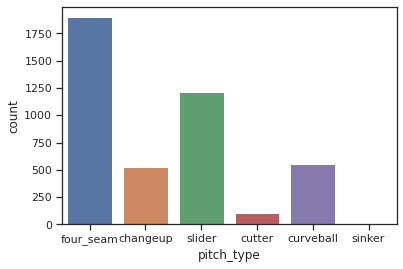

In [ ]:
sns.countplot(baseball.pitch_type)

# Comparing pitchers

In [ ]:
pitcher_mean = baseball.groupby('pitcher_id').mean()

pitcher_mean

,pa_of_inning,pitch_of_pa,inning,outs,balls,strikes,rel_speed,spin_rate,rel_height,rel_side,...,runner_on_second_id,runner_on_third_id,post_runner_on_first_id,post_runner_on_second_id,post_runner_on_third_id,direction,exit_speed,angle,distance,bearing
pitcher_id,,,,,,,,,,,,,,,,,,,,,
player_a,2.852066,2.908678,3.110331,0.933471,0.960744,0.839256,88.520707,2432.240030,5.540441,2.176534,...,599535.657033,514078.265537,615957.420376,640156.975143,568579.855491,3.725032,82.442890,12.314528,143.66435,4.548407
player_b,2.977836,3.023219,3.302375,0.865435,0.974142,0.891706,87.094599,2396.416397,5.691198,-2.240203,...,645455.741573,634598.132743,642178.869512,645552.205882,635667.475806,12.828943,77.731352,16.703554,151.62906,16.693475


In [ ]:
pitcher_avgstrikes = baseball.groupby('pitcher_id').strikes.mean()

print(pitcher_avgstrikes)

pitcher_id
player_a    0.839256
player_b    0.891706
Name: strikes, dtype: float64


In [ ]:
pitcher_avgspeed = baseball.groupby('pitcher_id').rel_speed.mean()

pitcher_avgspeed

pitcher_id
player_a    88.520707
player_b    87.094599
Name: rel_speed, dtype: float64

In [ ]:
pitcher_avgballs = baseball.groupby('pitcher_id').balls.mean()

pitcher_avgballs

pitcher_id
player_a    0.960744
player_b    0.974142
Name: balls, dtype: float64

In [ ]:
pitcher_avgspin = baseball.groupby('pitcher_id').spin_rate.mean()
pitcher_avgspin

pitcher_id
player_a    2432.240030
player_b    2396.416397
Name: spin_rate, dtype: float64

In [ ]:
PitcherNums = baseball[["pitcher_id", "strikes", "outs", "balls"]].groupby(by="pitcher_id").sum().sort_values(by="strikes")
display(PitcherNums)

,strikes,outs,balls
pitcher_id,,,
player_b,1688.0,1640,1846
player_a,2031.0,2259,2325


In [ ]:
fig = px.bar(baseball, x="pitch_type", color="pitcher_id",
             y='rel_speed',
             title="Comparing Pitch Type and Relative Speed by Pitcher",
             barmode='group',
             height=600
            )

fig.show()

In [ ]:
fig = px.bar(baseball, x="pitch_type", color="pitcher_id",
             y='spin_rate',
             title="Comparing Pitch Type and Spin Rate by Pitcher",
             barmode='group',
             height=600
            )

fig.show()

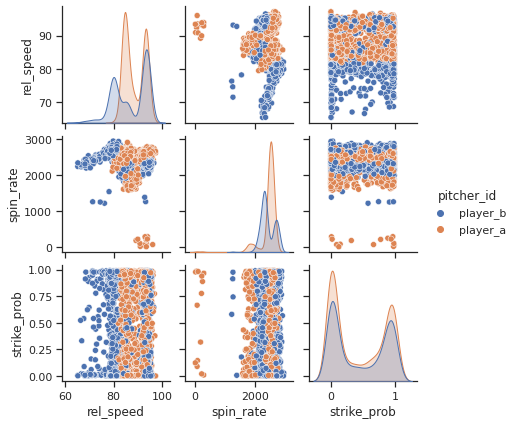

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(baseball,height=2,vars = [ 'rel_speed','spin_rate','strike_prob'], hue="pitcher_id")
plt.show()

# Visualizing pitcher A

In [ ]:
pitcher_A = baseball.loc[baseball["pitcher_id"]=="player_a"]

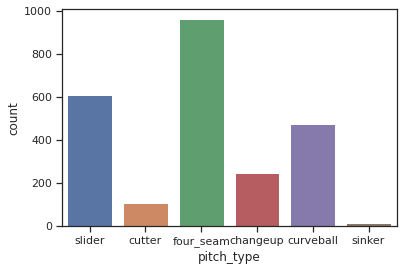

In [ ]:
# Visualizing player A's aresenal
sns.countplot(pitcher_A.pitch_type)

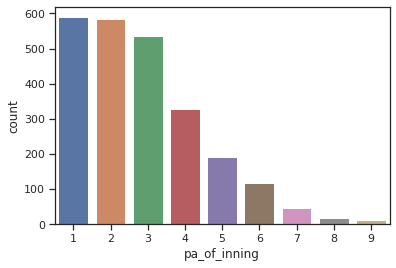

In [ ]:
# Pitcher A's number of plate appearances that occured in the inning
sns.countplot(pitcher_A.pa_of_inning)

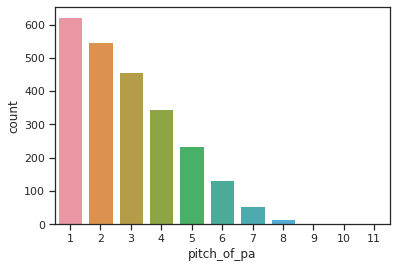

In [ ]:
# Pitcher A's number of pitches that occured in plate appearance
sns.countplot(pitcher_A.pitch_of_pa)

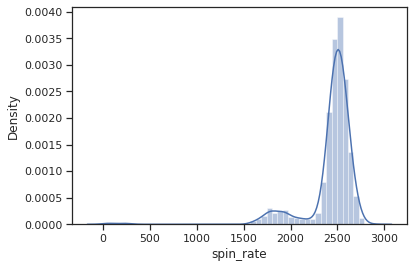

In [ ]:
sns.distplot(pitcher_A['spin_rate'].dropna())

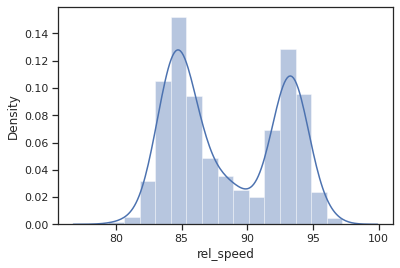

In [ ]:
sns.distplot(pitcher_A['rel_speed'].dropna())

In [ ]:
fig = px.sunburst(pitcher_A, path=["pitch_type", "rel_speed"])
fig.show()

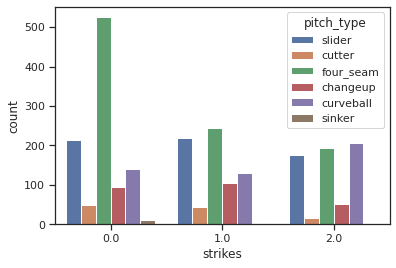

In [ ]:
sns.countplot(x='strikes', data=pitcher_A, hue='pitch_type')

# Visualizing Pitcher B

In [ ]:
pitcher_B = baseball.loc[baseball["pitcher_id"]=="player_b"]

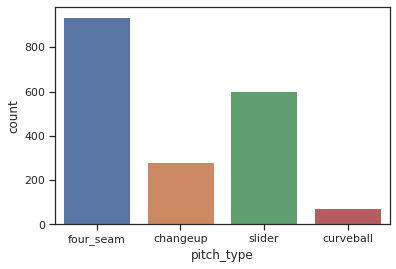

In [ ]:
# Visualizing player B's aresenal
sns.countplot(pitcher_B.pitch_type)

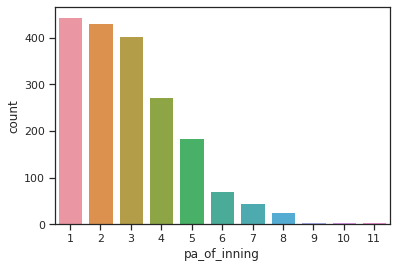

In [ ]:
# Pitcher B's number of plate appearances that occured in the inning
sns.countplot(pitcher_B.pa_of_inning)

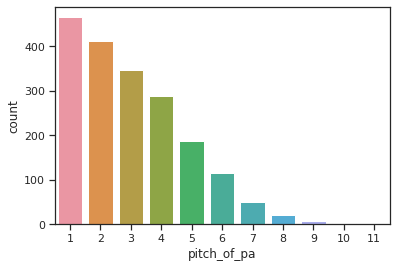

In [ ]:
# Pitcher B's number of pitches that occured in plate appearance
sns.countplot(pitcher_B.pitch_of_pa)

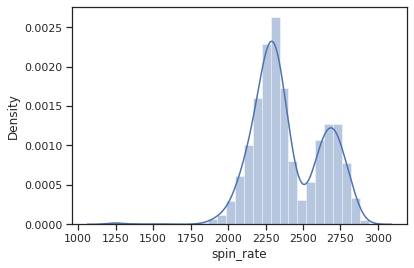

In [ ]:
sns.distplot(pitcher_B['spin_rate'].dropna())

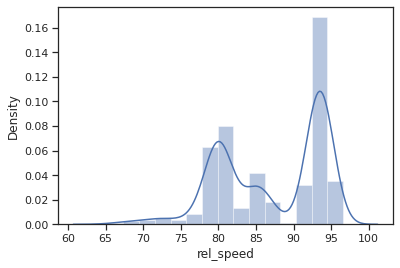

In [ ]:
sns.distplot(pitcher_B['rel_speed'].dropna())

In [ ]:
fig = px.sunburst(pitcher_B, path=["pitch_type", "rel_speed"])
fig.show()

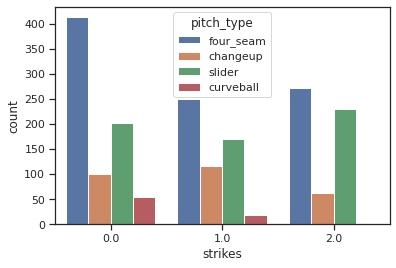

In [ ]:
sns.countplot(x='strikes', data=pitcher_B, hue='pitch_type')